In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

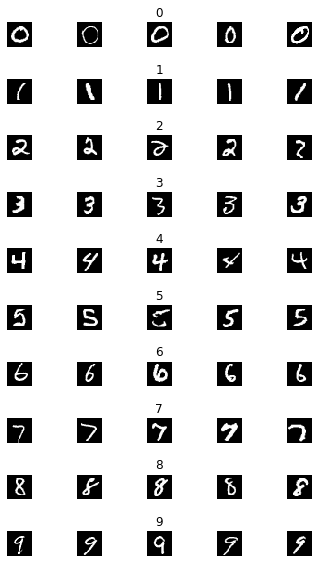

In [22]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

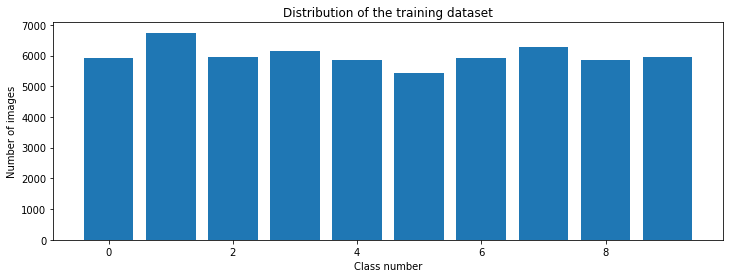

In [23]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Normalizing grayscale value

In [0]:
X_train = X_train/255 
X_test = X_test/255

## Reshaping data to 1D

In [26]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [28]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
history = model.fit(X_train, y_train, verbose=1, validation_split=0.1, epochs=10, batch_size=200, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 22us/sample - loss: 0.6110 - acc: 0.7968 - val_loss: 0.2620 - val_acc: 0.9240
Epoch 2/10
54000/54000 [==============================] - 1s 20us/sample - loss: 0.3154 - acc: 0.9072 - val_loss: 0.2365 - val_acc: 0.9298
Epoch 3/10
54000/54000 [==============================] - 1s 19us/sample - loss: 0.2860 - acc: 0.9150 - val_loss: 0.2413 - val_acc: 0.9293
Epoch 4/10
54000/54000 [==============================] - 1s 19us/sample - loss: 0.2685 - acc: 0.9199 - val_loss: 0.2223 - val_acc: 0.9337
Epoch 5/10
54000/54000 [==============================] - 1s 20us/sample - loss: 0.2498 - acc: 0.9252 - val_loss: 0.2081 - val_acc: 0.9423
Epoch 6/10
54000/54000 [==============================] - 1s 20us/sample - loss: 0.2389 - acc: 0.9290 - val_loss: 0.2097 - val_acc: 0.9395
Epoch 7/10
54000/54000 [==============================] - 1s 21us/sample - loss: 0.2381 - acc: 0.9287 - val_loss: 0.2

Text(0.5, 0, 'epoch')

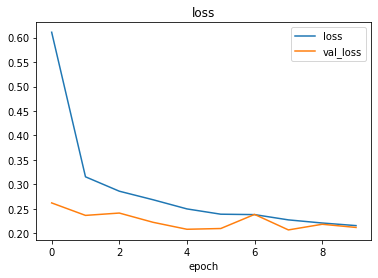

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

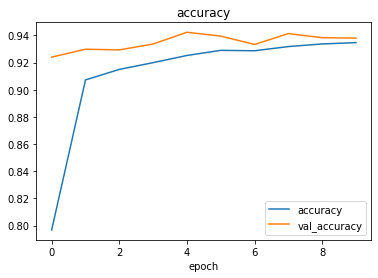

In [31]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [32]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print(f'Test score: {score[0]}')
print(f'Test accuracy: {score[1]}')

<class 'list'>
Test score: 0.2375278910972178
Test accuracy: 0.9276999831199646


In [0]:
import requests
import PIL.Image
from io import BytesIO

def predict(img_url=None, drawing=None):
  if drawing is not None:
     img = PIL.Image.open(BytesIO(b64decode(drawing)))
  else:
    response = requests.get(img_url, stream=True)
    img = PIL.Image.open(response.raw)
  img_array = np.asarray(img)
  resized = cv2.resize(img_array, (28,28))
  try:
    gray_scale = cv2.cvtColor(resized, cv2.COLOR_RGBA2GRAY)
  except:
    gray_scale = resized

  image = cv2.bitwise_not(gray_scale)
  plt.imshow(image, cmap=plt.get_cmap("gray"))

  plt.imshow(image, cmap=plt.get_cmap("gray"))
  image = image / 255
  image = image.reshape(1, 784)
  prediction = model.predict_classes(image)
  print('predicted digit: ', str(prediction))

predicted digit:  [8]


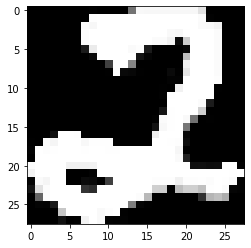

In [34]:
predict("https://i.ibb.co/Bt3j6KP/download.jpg")

In [0]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas style="border: 1px solid red" width=%d height=%d></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.fillStyle = "white";
ctx.fillRect(0, 0, canvas.width, canvas.height);
ctx.lineWidth = %d
ctx.lineCap = "round";
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""
def draw(filename='drawing.png', w=140, h=140, line_width=30):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  return data.split(',')[1]

predicted digit:  [5]


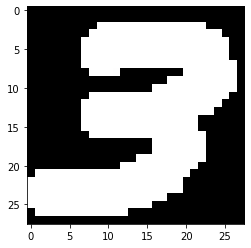

In [36]:
drawing = draw()
predict(drawing=drawing)